In [1]:
# 导入相关包
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import *
from matplotlib.ticker import MultipleLocator
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import ensemble
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.ensemble import VotingRegressor
import shap
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
from sklearn.metrics import make_scorer
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVR
# 设置警告过滤器
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=ConvergenceWarning)


In [2]:
# 数据集
dataset = pd.read_excel('MP-454-select-FEATURE - 15.xlsx')
dataset = dataset.replace (np.nan, 0)
#分类划分数据集
X_train1, X_test1, y_train1, y_test1 = train_test_split(dataset.iloc[:, 9:24], dataset.iloc[:, 7], test_size=0.2,
random_state=40)
train = dataset.iloc[:,9:24]
# print(X_train.shape)
# print(X_test.shape)
# 指定要移动的数据的索引
specific_indices = [56,433, 169,432,316,161,381]

# 初始化待添加到训练集的空 DataFrame 和 Series
X_rows_to_move = X_test1.loc[specific_indices]
y_rows_to_move = y_test1.loc[specific_indices]

# 从测试集中移除已移动的行
X_test = X_test1.drop(specific_indices)
y_test = y_test1.drop(specific_indices)

# 将提取的数据添加到训练集中
X_train = pd.concat([X_train1, X_rows_to_move], axis=0)
y_train = pd.concat([y_train1, y_rows_to_move], axis=0)

# 打印结果
print(X_train)
print(y_train)
print('训练集特征矩阵 X_train 的形状：', X_train.shape)
print('训练集标签向量 y_train 的形状：', y_train.shape)
print('测试集特征矩阵 X_test 的形状：', X_test.shape)
print('测试集标签向量 y_test 的形状：', y_test.shape)

     nHetero  ATS1dv       ATS0s     AATS3Z      ATSC1are    ATSC8i  \
376        0      91   48.583333  12.770833 -3.053113e-16  8.542051   
390        0     142   63.083333  12.338028  2.560000e-02 -4.009069   
204        1      58   92.027778   7.000000 -1.560421e-01 -0.784700   
351        0      54   30.000000   8.857143  7.806256e-16  0.000000   
288        2      92  107.777778   8.567568  1.093750e-01 -0.616658   
..       ...     ...         ...        ...           ...       ...   
169        0      36   35.000000   7.200000 -3.515625e-02  0.000000   
432        2      62  104.777778  14.000000 -3.967901e-01  0.000000   
316        2     149  164.527778   7.994444  1.359714e-01 -0.002679   
161        0      32   34.027778   9.750000 -3.408284e-02  0.000000   
381        0      86   56.027778   8.777778 -3.334139e-15 -7.653678   

         AATSC1pe    MATS2s        MATS1v        MATS1p    GATS1p  BCUTdv-1l  \
376  2.963486e-17  0.225729 -1.028013e-16 -3.073022e-16  1.150000  

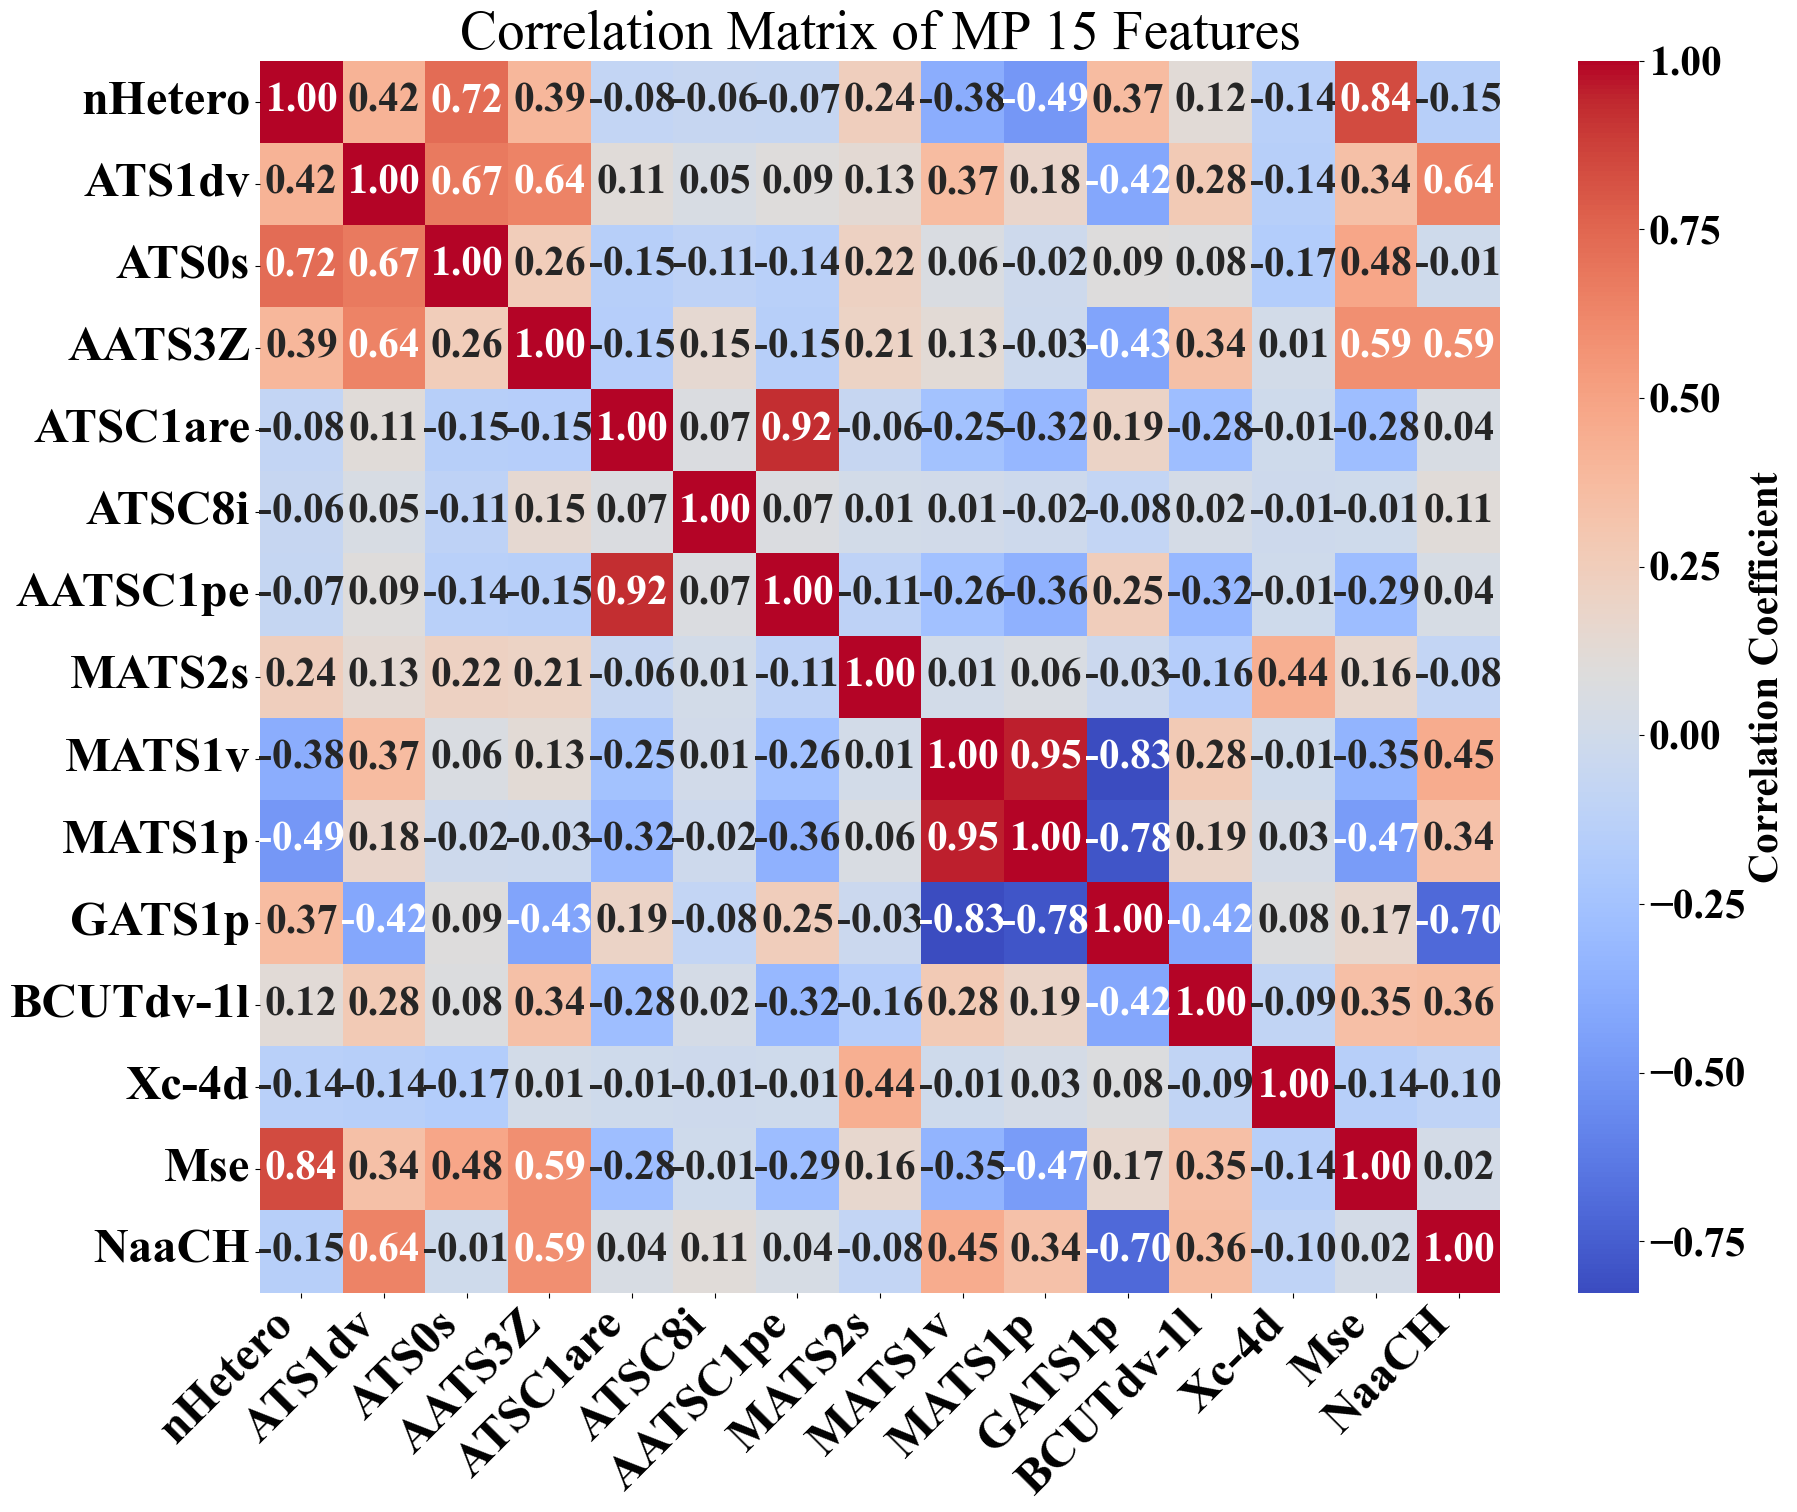

In [7]:
# Calculate the correlation matrix
#all_features=['RotRatio','NssCH2','nRot','SpMAD_Dzp','SssCH2','CIC1','bpol','ZMIC2','GATS2m','SpMAD_Dzse','CIC2','nBondsS','C2SP3','Diameter','ATSC2Z','ATSC2m','ETA_dBeta','Type','1.dnAB-sum','2.dnCCDB,I, CH2=CH2, aromatic','9.m(CH2),nonring','10.g-CH2-(nonring),i','C atom','H atom','Molecular weight (g/mol)','ECIndex']
#numerical_features = ['RotRatio', 'SpMAD_Dzp', 'SssCH2', 'CIC1', 'bpol', 'ZMIC2', 'GATS2m', 'SpMAD_Dzse','ATSC2Z','ATSC2m','ETA_dBeta','Type','9.m(CH2),nonring','C atom','Molecular weight (g/mol)','ECIndex']
#numerical_features = ['ATSC1p','AATSC1s','AATSC1se','AATSC1pe','MATS1are','GATS2c','GATS2se','GATS2are','SpMAD_Dzp','SssCH2','IC3','SIC1','SIC3','CIC4','VSA_EState7','RotRatio','Type','9.m(CH2),nonring','10.g-CH2-(nonring),i','C atom','Molecular weight (g/mol)']
import seaborn as sns
excel_data = pd.read_excel('MP-454-select-FEATURE - 15.xlsx', nrows=1)


# 设置字体为罗马字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'

# 选择特定的列作为数值特征
numerical_features = excel_data.columns.tolist()[9:24]

# 假设 `train` 是你的训练数据，在此之前你需要加载该数据集，例如：
# train = pd.read_excel('train_data.xlsx') 或者用
# train = pd.read_csv('train_data.csv')
# 这里假设 train 是一个已经存在的 DataFrame
correlation_matrix = train[numerical_features].corr()

# 绘制相关矩阵热图
plt.figure(figsize=(20,16))

# 创建热图时设置注释的字体大小
ax = sns.heatmap(correlation_matrix, 
                 annot=True, 
                 cmap='coolwarm', 
                 fmt=".2f", 
                 annot_kws={"size": 30, "fontweight": 'bold'},  # 设置注释字体大小和加粗
                 cbar_kws={'label': 'Correlation Coefficient'})

# 设置颜色条（cbar）的字体样式
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=30)  # 设置颜色条刻度标签字体大小
cbar.set_label('Correlation Coefficient', fontsize=30, weight='bold', fontname='Times New Roman')  # 设置颜色条标签字体

# 设置标题
plt.title('Correlation Matrix of MP 15 Features', fontsize=40, fontname='Times New Roman')

# 设置轴标签的字体大小
ax.set_xticklabels(ax.get_xticklabels(), fontsize=35, rotation=45, ha='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=35, rotation=0)

# 显示热图
plt.show()

In [9]:

# Model Selection and Training

# Initialize the models as one model
models =[("GradientBoostingRegressor", ensemble.GradientBoostingRegressor(random_state=0)),
    ("xgboost", XGBRegressor(random_state=0, n_jobs=-1)),
    ("LinearRegression", LinearRegression()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ( "PLSR" , PLSRegression(n_components=10))]
    #("gpr",  GaussianProcessRegressor(kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2)), n_restarts_optimizer=10))   ]

Model: GradientBoostingRegressor
r2: 91.41%
Standard Deviation: 3.29%
Model: xgboost
r2: 92.19%
Standard Deviation: 2.96%
Model: LinearRegression
r2: 79.74%
Standard Deviation: 3.31%
Model: RandomForestRegressor
r2: 91.33%
Standard Deviation: 4.11%
Model: PLSR
r2: 79.95%
Standard Deviation: 3.67%


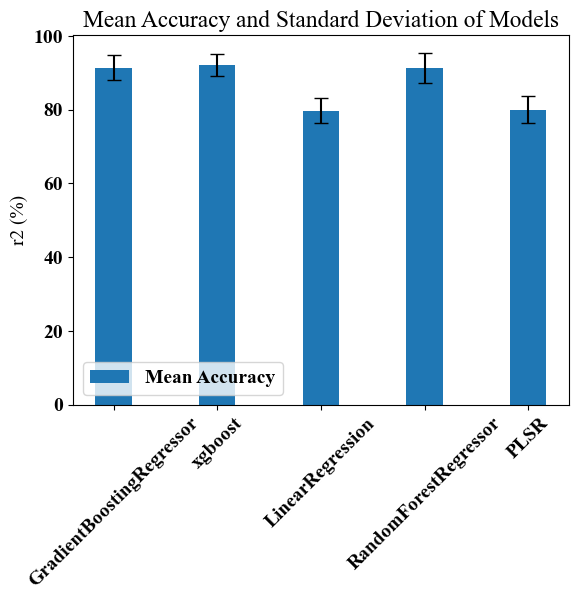

In [10]:
# Initialize lists to store mean accuracies and standard deviations
mean_accuracies = []
std_deviations = []

# Train each model using k-fold cross-validation and store results
for model_name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2',error_score='raise')
    mean_accuracy = cv_results.mean() * 100
    std_deviation = cv_results.std() * 100
    mean_accuracies.append(mean_accuracy)
    std_deviations.append(std_deviation)
    print(f"Model: {model_name}")
    print(f"r2: {mean_accuracy:.2f}%")
    print(f"Standard Deviation: {std_deviation:.2f}%")
    print("=" * 40)

# Plot mean accuracies with error bars
x = np.arange(len(models))
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x, mean_accuracies, width, label='Mean Accuracy', yerr=std_deviations, capsize=5)
ax.set_ylabel('r2 (%)')
ax.set_title('Mean Accuracy and Standard Deviation of Models')
ax.set_xticks(x)
ax.set_xticklabels([model_name for model_name, _ in models])
ax.legend()
plt.xticks(rotation=45)
plt.show()

In [3]:

best_xgboost = XGBRegressor(max_depth=9, n_estimators=658, random_state=42,learning_rate= 0.1361563021803977,min_child_weight=10)
best_GradientBoostingRegressor = ensemble.GradientBoostingRegressor(learning_rate=0.3, max_depth=5, n_estimators=250,  min_samples_split=4,random_state=42)
best_LinearRegression = LinearRegression()
best_RandomForestRegressor = RandomForestRegressor(max_depth= 7, max_features=7, min_samples_leaf=2, min_samples_split=5, n_estimators=150,random_state=42)
best_svr = SVR(kernel='rbf', C=282, gamma=0.01, epsilon= 3)
# Train the best models on the entire training set
best_xgboost.fit(X_train, y_train)
best_GradientBoostingRegressor.fit(X_train, y_train)
best_LinearRegression.fit(X_train, y_train)
best_RandomForestRegressor.fit(X_train, y_train)
best_svr.fit(X_train, y_train)
#best_PLSR.fit(X_train, y_train)
# Evaluate the best models on the test set
xgboost_train_r2 = r2_score(y_train, best_xgboost.predict(X_train))
xgboost_train_rmse = np.sqrt(mean_squared_error(y_train, best_xgboost.predict(X_train)))
xgboost_test_r2 = r2_score(y_test, best_xgboost.predict(X_test))
xgboost_test_rmse = np.sqrt(mean_squared_error(y_test, best_xgboost.predict(X_test)))

GradientBoostingRegressor_train_r2 = r2_score(y_train, best_GradientBoostingRegressor.predict(X_train))
GradientBoostingRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_GradientBoostingRegressor.predict(X_train)))
GradientBoostingRegressor_test_r2 = r2_score(y_test, best_GradientBoostingRegressor.predict(X_test))
GradientBoostingRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_GradientBoostingRegressor.predict(X_test)))

LinearRegression_train_r2 = r2_score(y_train, best_LinearRegression.predict(X_train))
LinearRegression_train_rmse = np.sqrt(mean_squared_error(y_train, best_LinearRegression.predict(X_train)))
LinearRegression_test_r2 = r2_score(y_test, best_LinearRegression.predict(X_test))
LinearRegression_test_rmse = np.sqrt(mean_squared_error(y_test, best_LinearRegression.predict(X_test)))

RandomForestRegressor_train_r2 = r2_score(y_train, best_RandomForestRegressor.predict(X_train))
RandomForestRegressor_train_rmse = np.sqrt(mean_squared_error(y_train, best_RandomForestRegressor.predict(X_train)))
RandomForestRegressor_test_r2 = r2_score(y_test, best_RandomForestRegressor.predict(X_test))
RandomForestRegressor_test_rmse = np.sqrt(mean_squared_error(y_test, best_RandomForestRegressor.predict(X_test)))

SVR_train_r2 = r2_score(y_train, best_svr.predict(X_train))
SVR_train_rmse = np.sqrt(mean_squared_error(y_train, best_svr.predict(X_train)))
SVR_test_r2 = r2_score(y_test, best_svr.predict(X_test))
SVR_test_rmse = np.sqrt(mean_squared_error(y_test, best_svr.predict(X_test)))


print("XGBRegressor train r2:", xgboost_train_r2)
print("XGBRegressor train RMSE:", xgboost_train_rmse)
print("XGBRegressor Test r2:", xgboost_test_r2)
print("XGBRegressor Test RMSE:", xgboost_test_rmse)

print("GradientBoostingRegressor train r2:", GradientBoostingRegressor_train_r2)
print("GradientBoostingRegressor train RMSE:", GradientBoostingRegressor_train_rmse)
print("GradientBoostingRegressor Test r2:", GradientBoostingRegressor_test_r2)
print("GradientBoostingRegressor Test RMSE:", GradientBoostingRegressor_test_rmse)

print("LinearRegression train r2:", LinearRegression_train_r2)
print("LinearRegression train RMSE:", LinearRegression_train_rmse)
print("LinearRegression Test r2:", LinearRegression_test_r2)
print("LinearRegression Test RMSE:", LinearRegression_test_rmse)

print("RandomForestRegressor train r2:", RandomForestRegressor_train_r2)
print("RandomForestRegressor train RMSE:", RandomForestRegressor_train_rmse)
print("RandomForestRegressor Test r2:", RandomForestRegressor_test_r2)
print("RandomForestRegressor Test RMSE:", RandomForestRegressor_test_rmse)

print("SVR train r2:", SVR_train_r2)
print("SVR  train RMSE:", SVR_train_rmse)
print("SVR  Test r2:", SVR_test_r2)
print("SVR  Test RMSE:",SVR_test_rmse)

XGBRegressor train r2: 0.9998283446362145
XGBRegressor train RMSE: 0.8420325826993577
XGBRegressor Test r2: 0.9844522309043434
XGBRegressor Test RMSE: 7.5875339275786216
GradientBoostingRegressor train r2: 0.9998338711390411
GradientBoostingRegressor train RMSE: 0.8283669275268178
GradientBoostingRegressor Test r2: 0.9737736251970833
GradientBoostingRegressor Test RMSE: 9.854525931823638
LinearRegression train r2: 0.8383767806696318
LinearRegression train RMSE: 25.837594869183867
LinearRegression Test r2: 0.8121029135129252
LinearRegression Test RMSE: 26.37707462046118
RandomForestRegressor train r2: 0.9686103315822886
RandomForestRegressor train RMSE: 11.386587078541837
RandomForestRegressor Test r2: 0.9644081909143986
RandomForestRegressor Test RMSE: 11.479993351312654
SVR train r2: 0.9836357961857577
SVR  train RMSE: 8.221435381202989
SVR  Test r2: 0.8300948548259681
SVR  Test RMSE: 25.082445095498187


Ensemble Test Accuracy: 0.9834
The mean squared error (MSE) on train set: 2.4493
The mean squared error (MSE) on test set: 7.8320
The R² on train set: 0.9985
The R² on test set: 0.9834
The ME on train set: 26.1613
The ME on test set: 22.7959
[13.53324871 11.71227102 19.53861632 14.88856375 12.45121737 33.32566387
  9.50614134 11.17733989 12.09335103 10.69171175]
[0.95427398 0.96258089 0.92966263 0.93991116 0.96005761 0.81056433
 0.97334323 0.95368468 0.95679025 0.97324185]
[ 38.52559945  31.28798711  57.7673126   46.88553958  32.91291426
 180.3067105   28.56081252  26.59133706  36.7418969   26.25992959]
Cross-validated RMSE scores: 14.891812505810847
Cross-validated r2 scores: 0.9414110595426534
Cross-validated ME scores: 50.584003956117925


<Figure size 640x480 with 0 Axes>

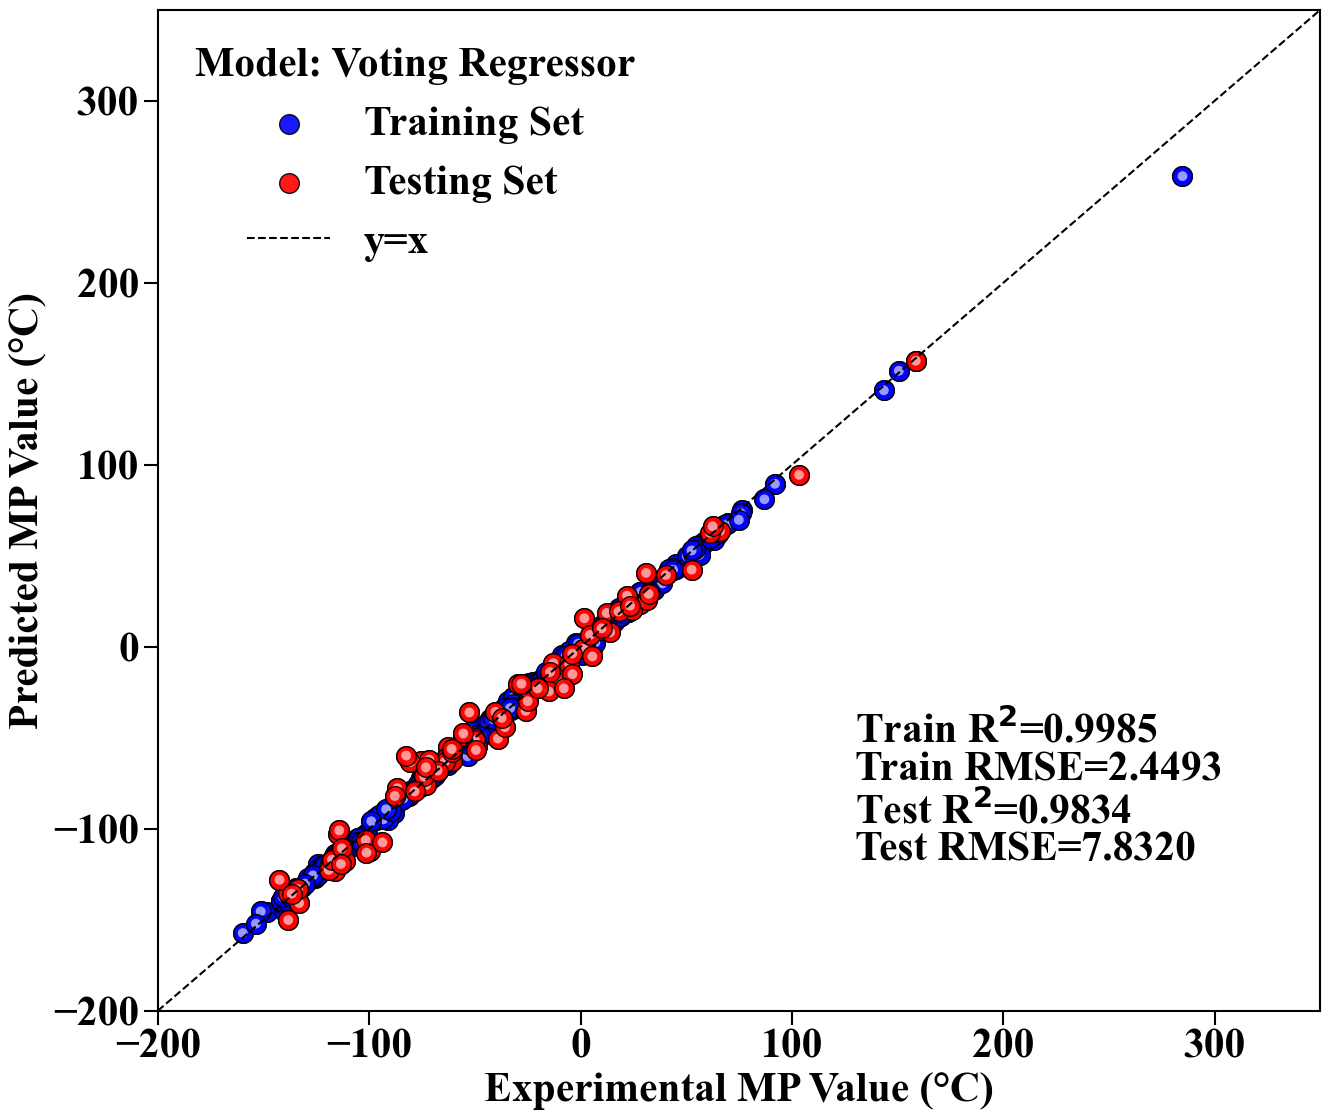

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, max_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold

# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14

# 定义集成模型
estimators = [('xgboost', best_xgboost), 
              ('GradientBoostingRegressor', best_GradientBoostingRegressor), 
              ('LinearRegression', best_LinearRegression),
              ('RandomForestRegressor', best_RandomForestRegressor),
              ('SVR', best_svr)]
weights = [0.5,0.3,0,0.2,0]  # 分配的权重和应该相加等于1

# 创建VotingRegressor
ensemble_model = VotingRegressor(estimators=estimators, weights=weights)

# 训练集成模型
ensemble_model.fit(X_train, y_train)

# 在测试集上评估集成模型并打印准确度分数
ensemble_test_accuracy = ensemble_model.score(X_test, y_test)  # 回归问题中返回的就是R²
print(f"Ensemble Test Accuracy: {ensemble_test_accuracy:.4f}")

# 计算MSE和R²
ensemble_train_rmse = np.sqrt(mean_squared_error(y_train, ensemble_model.predict(X_train)))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test, ensemble_model.predict(X_test)))
ensemble_train_score = ensemble_model.score(X_train, y_train)
ensemble_test_score = ensemble_model.score(X_test, y_test)
ensemble_train_me = max_error(y_train, ensemble_model.predict(X_train))
ensemble_test_me = max_error(y_test, ensemble_model.predict(X_test))

print("The mean squared error (MSE) on train set: {:.4f}".format(ensemble_train_rmse))
print("The mean squared error (MSE) on test set: {:.4f}".format(ensemble_test_rmse))
print("The R² on train set: {:.4f}".format(ensemble_train_score))
print("The R² on test set: {:.4f}".format(ensemble_test_score))
print("The ME on train set: {:.4f}".format(ensemble_train_me))
print("The ME on test set: {:.4f}".format(ensemble_test_me))

# 对模型进行交叉验证并计算平均分数
rmse_scorer = make_scorer(mean_squared_error, squared=False)
r2_scorer = make_scorer(r2_score)
ME_scorer = make_scorer(max_error)
kf = KFold(n_splits=10, shuffle=True, random_state=35)
scores1 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=rmse_scorer)
scores2 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring='r2')
scores3 = cross_val_score(ensemble_model, X_train, y_train, cv=kf, scoring=ME_scorer)

print(scores1)
print(scores2)
print(scores3)

average_score1 = np.mean(scores1)
average_score2 = np.mean(scores2)
average_score3 = np.mean(scores3)

print("Cross-validated RMSE scores:", average_score1)
print("Cross-validated r2 scores:", average_score2)
print("Cross-validated ME scores:", average_score3)

# 清除当前图形
plt.clf()
plt.figure(figsize=(15, 13))

# 设置坐标轴标签和刻度
plt.xlabel('Experimental MP Value (°C)', fontsize=30, weight='bold')
plt.ylabel('Predicted MP Value (°C)', fontsize=30, weight='bold')
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')

# 绘制散点图
def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
    # 添加高光效果
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)

# 绘制训练集和测试集的散点图
plot_3d_scatter(y_train.values, ensemble_model.predict(X_train), plt, 'blue', 'Training Set', 'o')
plot_3d_scatter(y_test.values, ensemble_model.predict(X_test), plt, 'red', 'Testing Set', 'o')

# 设置坐标轴范围
plt.xlim(left=-200, right=350)  # 设置横坐标从 100 到 500
plt.ylim(bottom=-200, top=350)

# 绘制y=x参考线
plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

# 在图例框中添加额外的信息
extra_info = 'Model: Voting Regressor'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False)

# 在图中右下角添加指定文本
plt.text(0.6, 0.28, f"Train R$^{{2}}$={ensemble_train_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.24, f"Train RMSE={ensemble_train_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
#plt.text(0.6, 0.24, f"Train ME={ensemble_train_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

plt.text(0.6, 0.20, f"Test R$^{{2}}$={ensemble_test_score:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"Test RMSE={ensemble_test_rmse:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
#plt.text(0.6, 0.12, f"Test ME={ensemble_test_me:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

# 加粗边框
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5,length=10)
# 显示图形
plt.show()

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   7 out of  10 | elapsed:   10.6s remaining:    4.5s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   12.4s finished


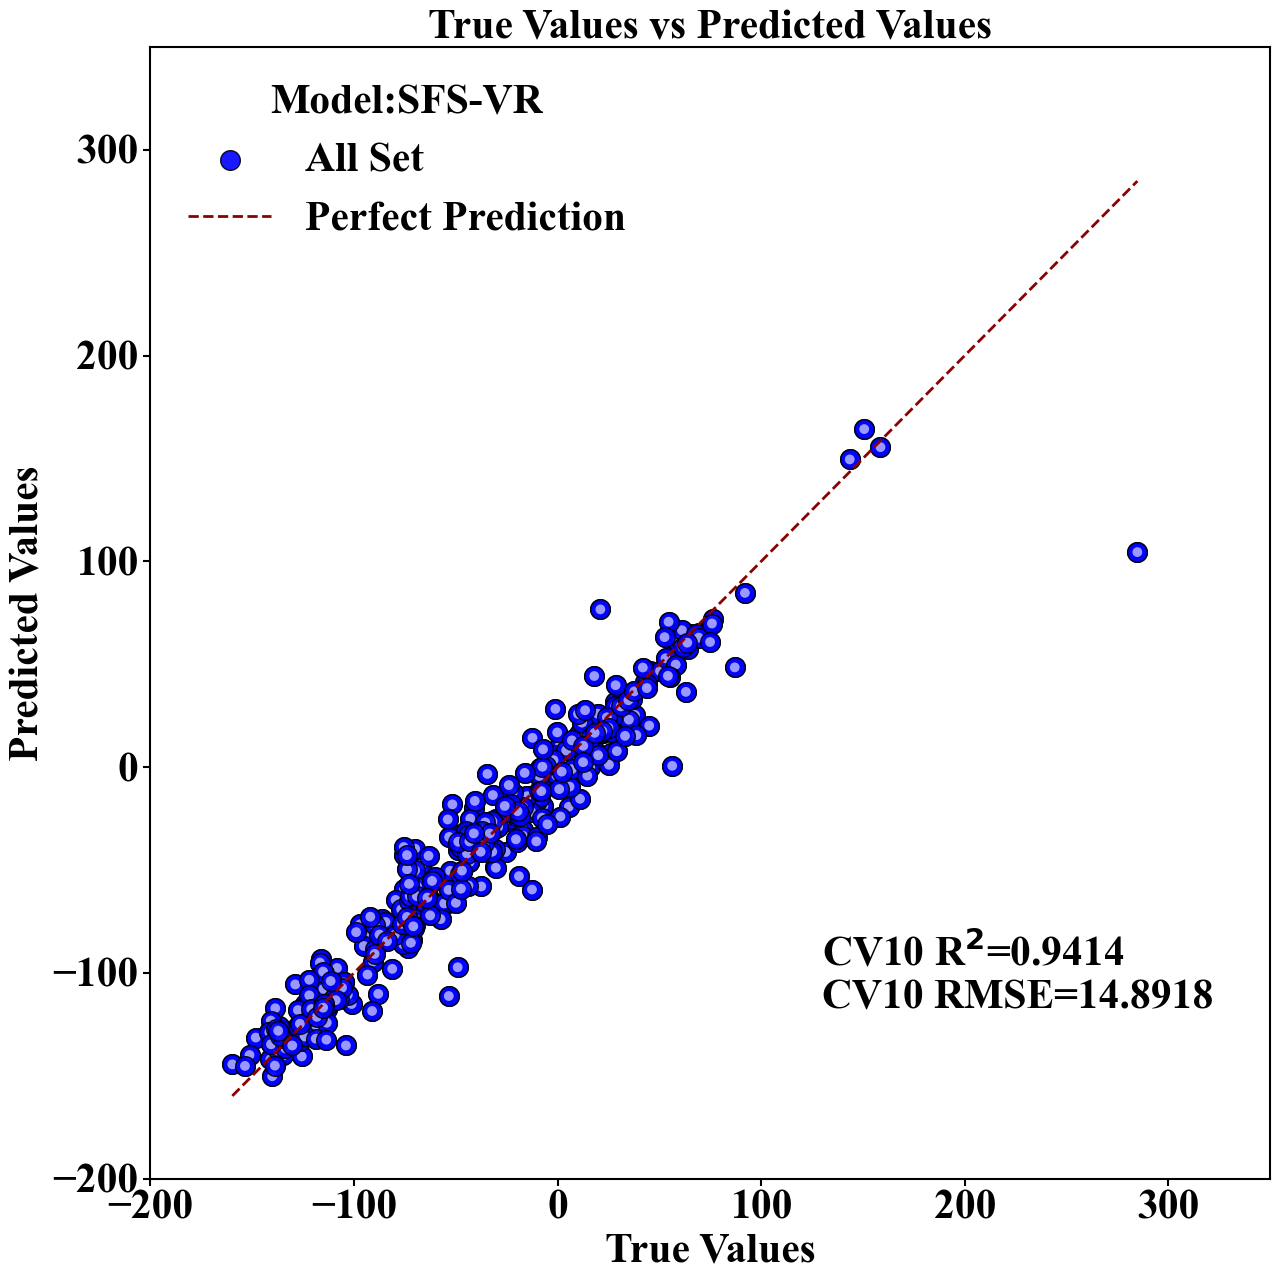

In [5]:
#训练集10折交叉验证图
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
# 创建图形
plt.figure(figsize=(13, 13))
kf = KFold(n_splits=10, shuffle=True, random_state=35)
# 设置字体
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['font.size'] = 14
plt.xticks(fontsize=30, weight='bold')
plt.yticks(fontsize=30, weight='bold')
# 绘制散点图
def plot_3d_scatter(x, y, ax, color, label, marker):
    scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
    # 添加高光效果
    for i in range(len(x)):
        ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
        ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)
# 绘制散点图，使用深蓝色和朦胧白色边缘
train_cv10_predicted_values = cross_val_predict(ensemble_model, X_train, y_train, cv=kf, n_jobs=8,verbose=2)
# train_cv10_r2 = scores2
# train_cv10_rmse = scores1

plot_3d_scatter(y_train.values, train_cv10_predicted_values, plt, 'blue', 'All Set', 'o')

# 添加完美预测的参考线
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='darkred', linestyle='--', linewidth=2, label='Perfect Prediction')

# 添加标签和标题
plt.xlabel('True Values', fontsize=30, weight='bold')
plt.ylabel('Predicted Values', fontsize=30, weight='bold')
plt.title('True Values vs Predicted Values', fontsize=30, weight='bold')
plt.xlim(left=-200, right=350)  # 设置横坐标从 100 到 500
plt.ylim(bottom=-200, top=350)

# 添加图例
extra_info = 'Model:SFS-VR'
plt.legend(loc='upper left', title=extra_info, prop={'size': 30, 'weight': 'bold'}, title_fontsize='30', frameon=False, fancybox=True)

# 添加统计指标到图中
plt.text(0.6, 0.20, f"CV10 R$^{{2}}$={average_score2:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)
plt.text(0.6, 0.16, f"CV10 RMSE={average_score1:.4f}", fontsize=30, weight='bold', ha='left', va='center', transform=plt.gca().transAxes)

# # 添加网格线
# plt.grid(color='gray', linestyle='--', linewidth=0.5)

# 调整布局
plt.tight_layout()

# 获取当前轴
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
plt.tick_params(width=1.5, length=5)

# 保存图像
#plt.savefig(os.path.join(save_folder, 'LFS_MLP_true_vs_predicted_combined_10_26.png'))

# 显示图像
plt.show()

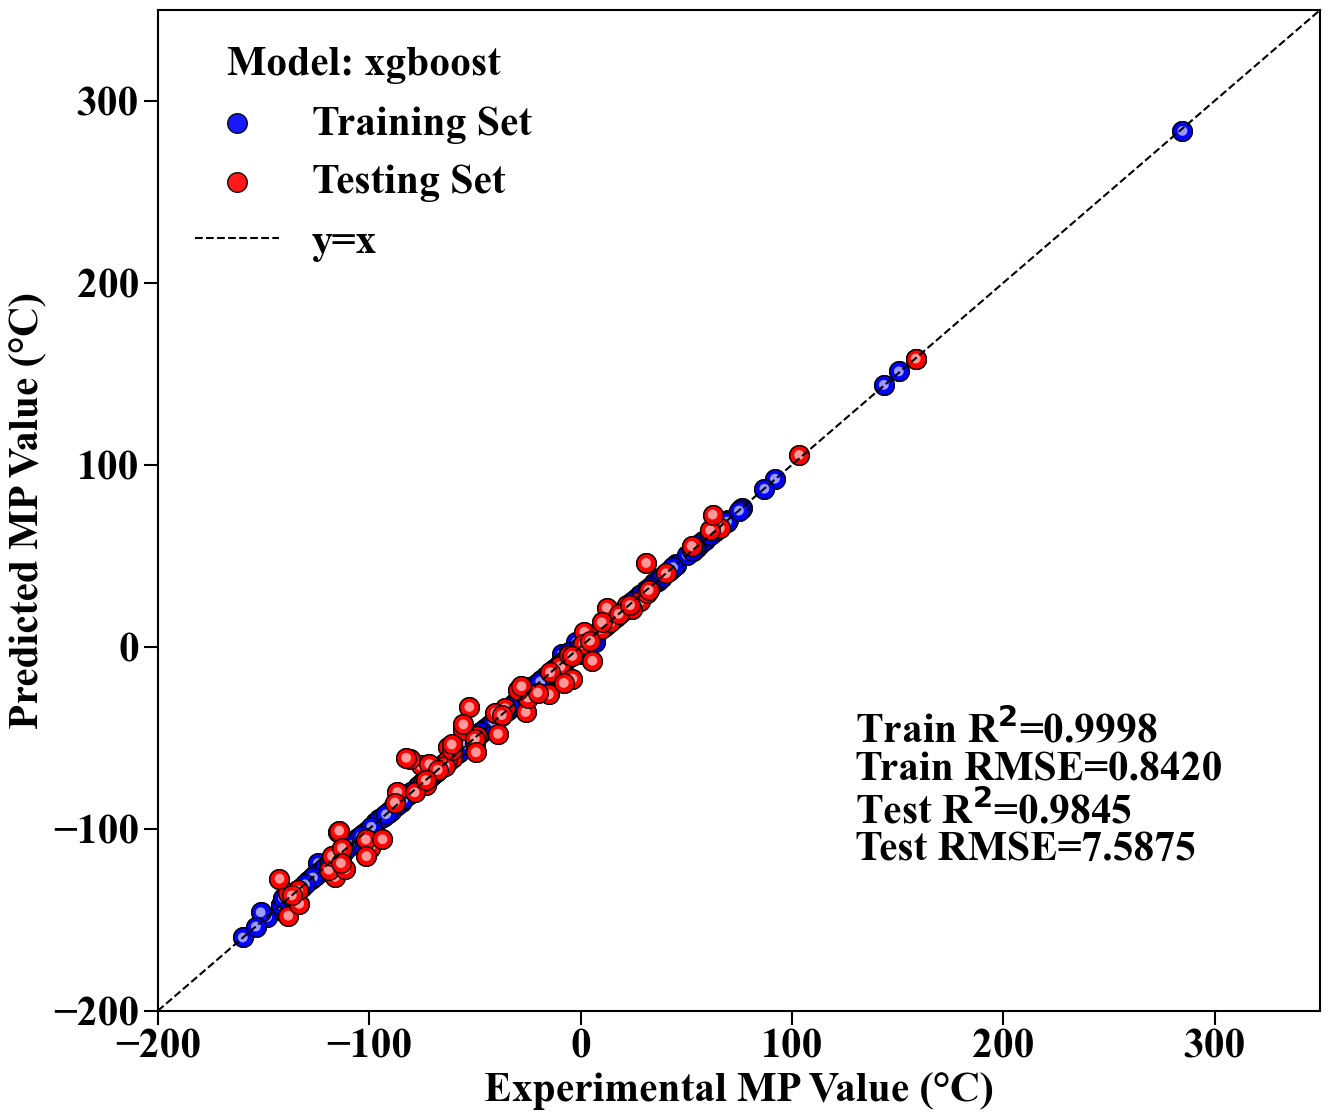

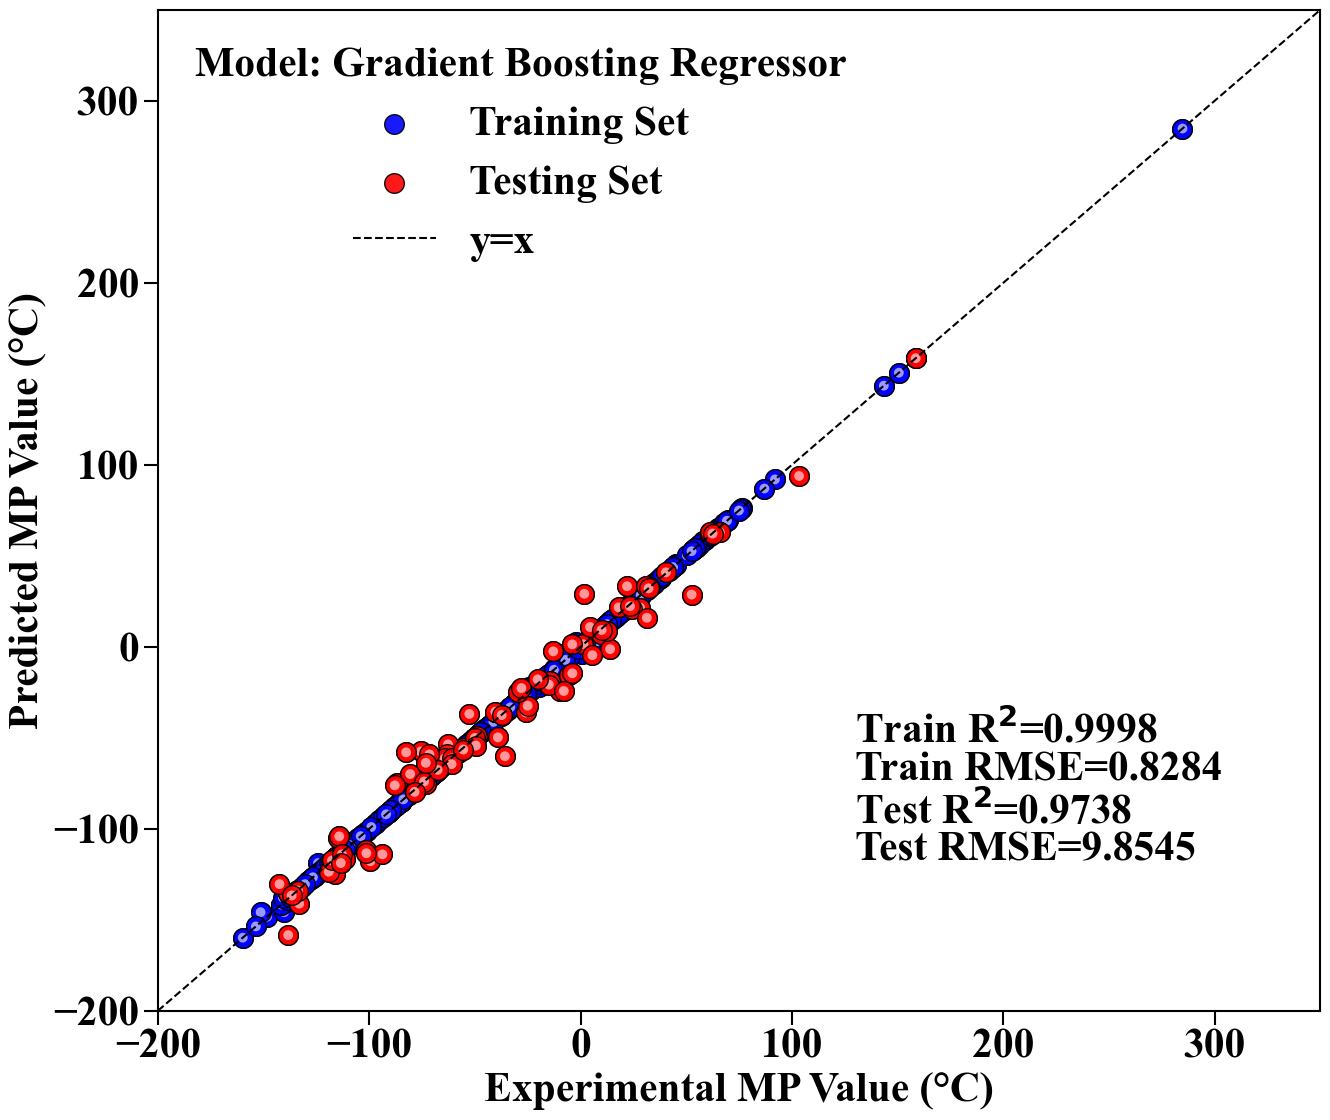

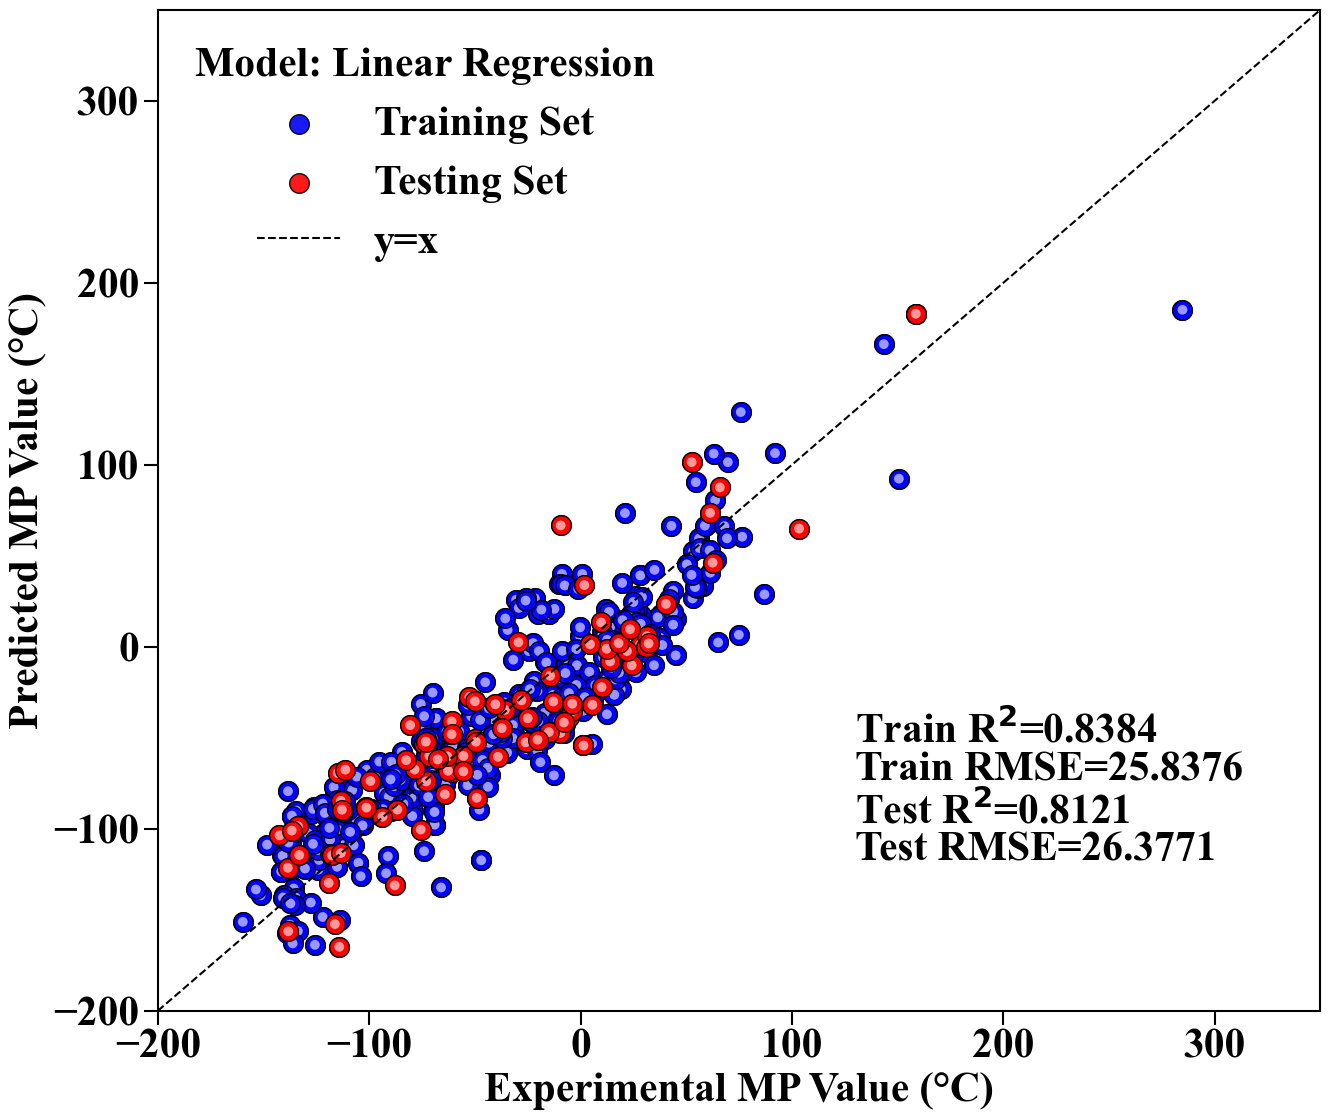

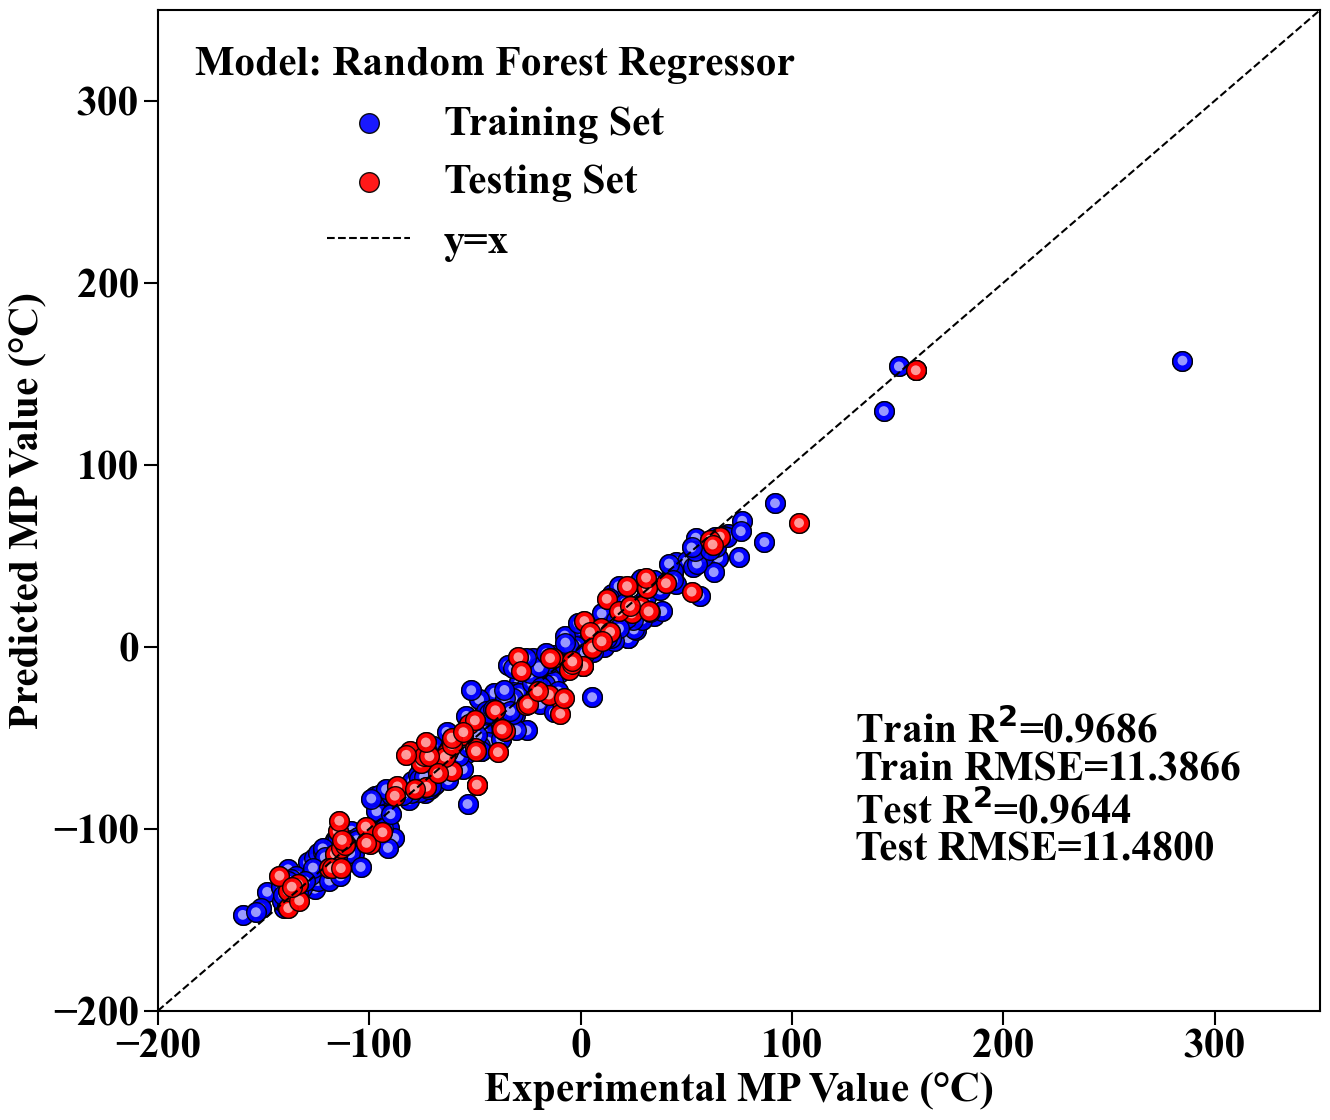

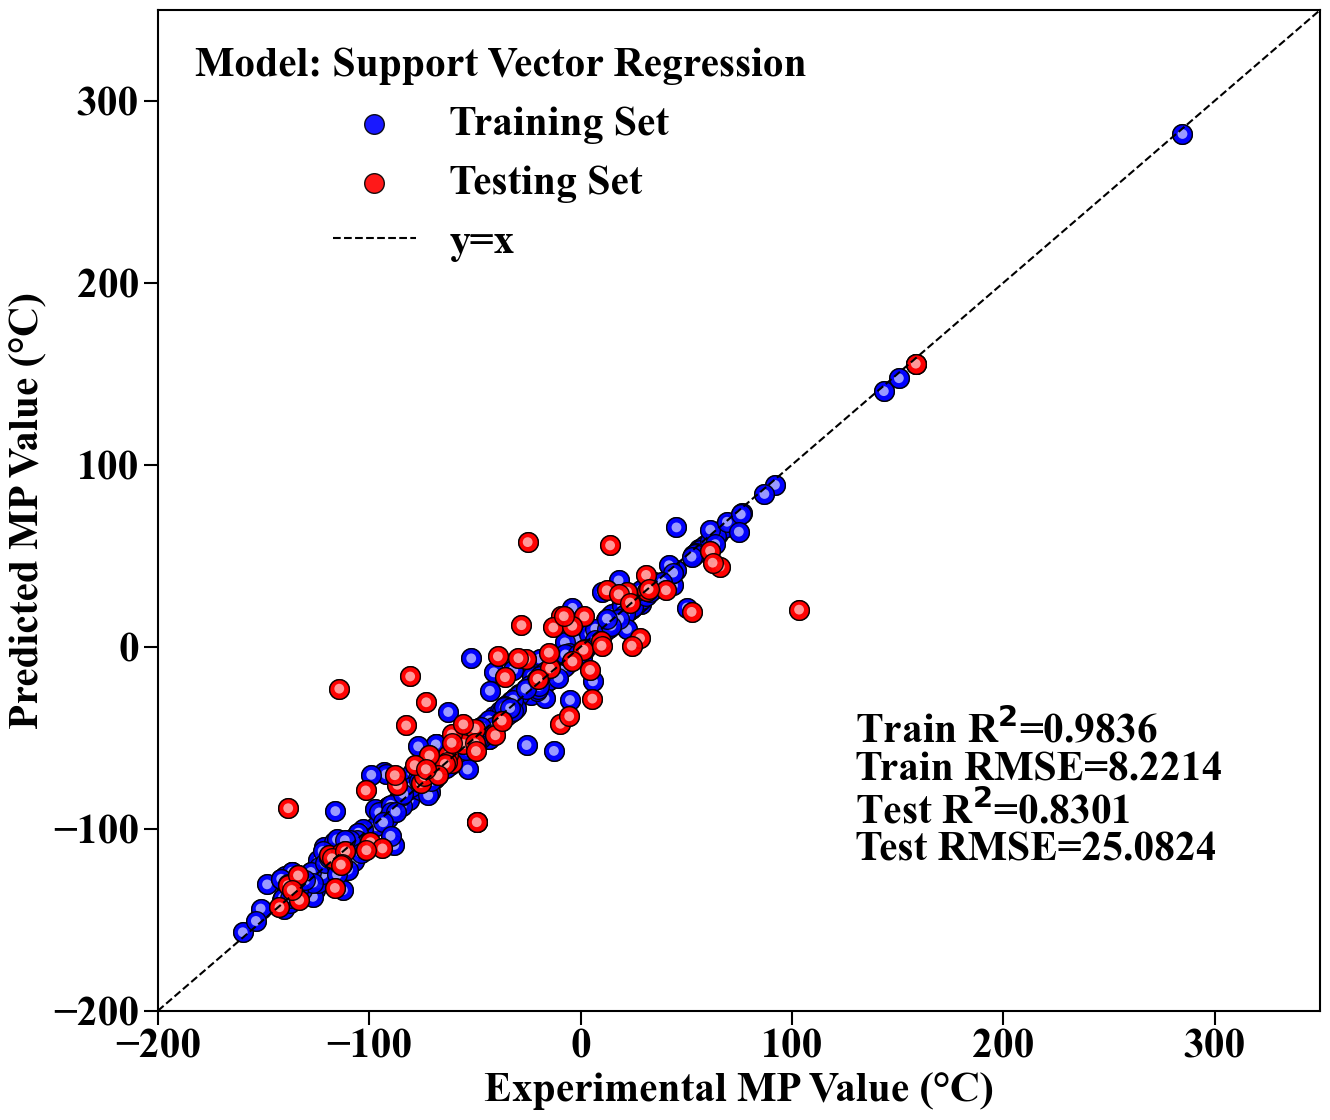

In [9]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
models = [best_xgboost, best_GradientBoostingRegressor, best_LinearRegression, best_RandomForestRegressor,best_svr]
names = ['xgboost', 'Gradient Boosting Regressor', 'Linear Regression', 'Random Forest Regressor','Support Vector Regression']
for model, name in zip(models, names):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = r2_score(y_train, train_pred)
    test_score = r2_score(y_test, test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_ME = max_error(y_train, train_pred)
    test_ME = max_error(y_test, test_pred)
    plt.figure(figsize=(15, 13))
    plt.clf()

    # 设置坐标轴标签
    plt.xlabel('Experimental MP Value (°C)', fontsize=30, weight='bold')
    plt.ylabel('Predicted MP Value (°C)', fontsize=30, weight='bold')
    plt.xticks(fontsize=30, weight='bold')
    plt.yticks(fontsize=30, weight='bold')

    # 绘制网格线
    #plt.grid(True, linestyle='--', alpha=1)

    # 绘制训练集和测试集的散点图，添加立体效果
    def plot_3d_scatter(x, y, ax, color, label, marker):
        # 绘制渐变色的点
        scatter = ax.scatter(x, y, color=color, edgecolor='black', label=label, s=200, alpha=0.9, marker=marker)
        # 添加高光效果
        for i in range(len(x)):
            ax.scatter(x[i], y[i], color=color, edgecolor='black', s=200, alpha=0.9, marker=marker)
            ax.scatter(x[i], y[i], color='white', edgecolor='none', s=50, alpha=0.6, marker=marker)

    ax = plt.gca()
    # 绘制训练集散点图
    plot_3d_scatter(y_train.values, train_pred, ax, 'blue', 'Training Set', 'o')
    # 绘制测试集散点图
    plot_3d_scatter(y_test.values, test_pred, ax, 'red', 'Testing Set', 'o')
    # 绘制y=x参考线
    # # 设置坐标轴范围
    plt.xlim(left=-200, right=350)  # 设置横坐标从 100 到 500
    plt.ylim(bottom=-200, top=350)
    plt.plot([plt.xlim()[0], plt.xlim()[1]], [plt.ylim()[0], plt.ylim()[1]], color='black', linestyle='--', label='y=x')

    # 在图例框中添加额外的信息
    extra_info = f'Model: {name}'
    plt.legend(loc='upper left', title=extra_info, prop={'size': 30}, title_fontsize='30', frameon=False)

    # 在图中右下角添加指定文本
    plt.text(0.6, 0.28, f"Train R$^{{2}}$={train_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.24, f"Train RMSE={train_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.24, f"Train ME={train_ME:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.20, f"Test R$^{{2}}$={test_score:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    plt.text(0.6, 0.16, f"Test RMSE={test_rmse:.4f}", fontsize=30, ha='left',weight='bold', va='center', transform=plt.gca().transAxes)
    # plt.text(0.6, 0.12, f"Test ME={test_ME:.4f}", fontsize=30, ha='left', weight='bold', va='center', transform=plt.gca().transAxes)
    # 加粗边框
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    plt.tick_params(width=1.5,length=10)#修改刻度线线粗细width参数，修改刻度字体labelsize参数

    # 显示图形
    plt.show()

[[-1.10254856e-01  1.12579591e+01 -2.26797626e+01 ...  1.50273444e-01
   3.14686596e-01 -6.33340015e-01]
 [-1.01403670e-01  3.21104083e+01  3.23473477e+00 ... -3.09363823e-02
   1.94969856e-01  7.43007729e-01]
 [ 6.81144771e-02  1.47855688e+01  2.07986986e+01 ... -4.57168572e-02
   1.51082752e+00  1.09277296e-01]
 ...
 [ 8.78848958e-02  2.58125219e+01  2.97269187e+01 ... -9.29099648e-03
   1.51242080e+00 -1.35879441e-01]
 [-2.03742269e-01 -4.42221340e+01 -2.17326706e+01 ...  2.45845632e-01
   4.77700231e-02 -1.28821383e-01]
 [-1.10790026e-01  6.89687118e+00 -7.54760752e+00 ... -5.41414793e-02
   3.29696254e-01 -1.96280909e+00]]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Xc-4d'),
  Text(0, 1, 'nHetero'),
  Text(0, 2, 'NaaCH'),
  Text(0, 3, 'Mse'),
  Text(0, 4, 'ATSC8i'),
  Text(0, 5, 'GATS1p'),
  Text(0, 6, 'AATSC1pe'),
  Text(0, 7, 'BCUTdv-1l'),
  Text(0, 8, 'AATS3Z'),
  Text(0, 9, 'MATS2s'),
  Text(0, 10, 'MATS1p'),
  Text(0, 11, 'ATSC1are'),
  Text(0, 12, 'MATS1v'),
  Text(0, 13, 'ATS0s'),
  Text(0, 14, 'ATS1dv')])

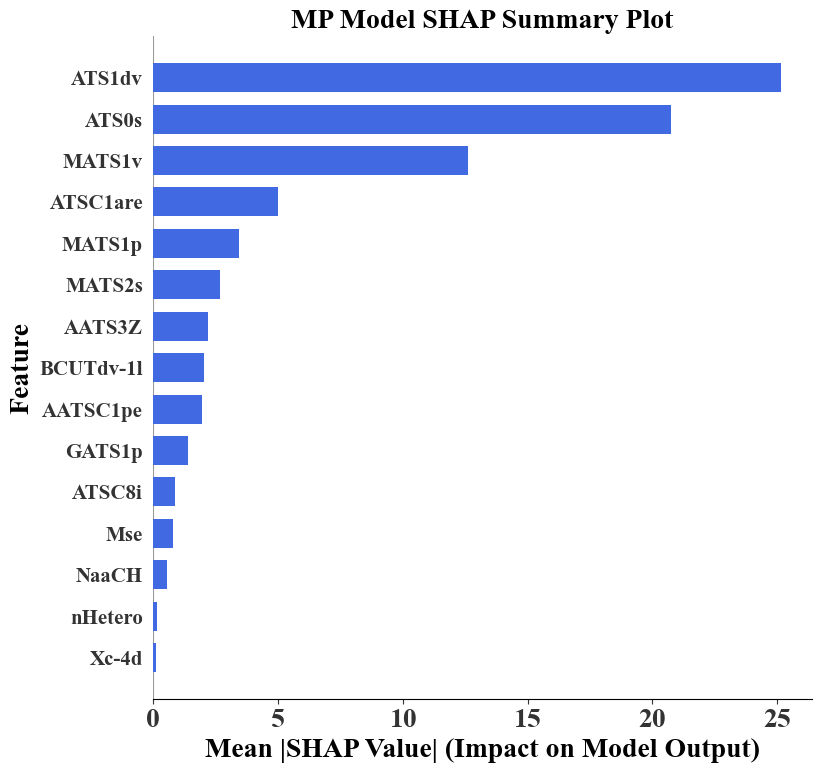

In [34]:
base_models = ensemble_model.named_estimators_
weights = np.array([0.5,0.3,0,0.2,0])

# 存储所有基模型的 SHAP 值
shap_values_dict = {}

# 计算每个基模型的 SHAP 值并加权
for (model_name, model), weight in zip(base_models.items(), weights):
    if weight == 0:
        continue
    
    # 创建 SHAP 解释器
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    
    # 存储加权 SHAP 值
    shap_values_dict[model_name] = shap_values.values * weight

# 合成 SHAP 值
shap_values_combined = np.sum(list(shap_values_dict.values()), axis=0)
print(shap_values_combined)
# shap.summary_plot(shap_values_combined, X_train)


# 设置字体和样式
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

# 绘制SHAP值的摘要图
shap.summary_plot(shap_values_combined, X_train, plot_type="bar", color='royalblue', show=False)

# 获取当前图形
fig = plt.gcf()
ax = plt.gca()

# 设置图形的标题和标签
ax.set_title('MP Model SHAP Summary Plot', fontsize=20, weight='bold')
ax.set_xlabel('Mean |SHAP Value| (Impact on Model Output)', fontsize=20, weight='bold')
ax.set_ylabel('Feature', fontsize=20, weight='bold')
plt.xticks(fontsize=20, weight='bold')
plt.yticks(fontsize=15, weight='bold')